# Lab2 - Scikit-Learn

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

## 0. Loading Dataset

In [ ]:
# read the data into datafram
data = pd.read_csv('breast_cancer.csv')

In [ ]:
data.head()  # head method show only first 5 rows

In [ ]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

In [44]:
# y includes our labels and x includes our features
y = data.diagnosis      # two labels: M = malignant, B = benign 

dropping_list = ['Unnamed: 32','id','diagnosis']
X = data.drop(dropping_list, axis = 1 )         # exclude three columns in X_feature matrix 
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.describe()

In [49]:
# split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 1. Supervised learning: classification

In [50]:
# you code here 
# 1. GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB # import Gaussian Naive Bayes model
from sklearn.metrics import accuracy_score # import accuracy_score

clf = GaussianNB() # create Gaussian Naive Bayes classifier, clf is a classifier
clf.fit(X_train, y_train) # fit the classifier with training data, training data is X_train and y_train
y_pred = clf.predict(X_test) # do prediction on test data, X_test is test data, y_pred is predicted values, y_test is true values
accuracy = accuracy_score(y_test, y_pred) # get accuracy score, y_test is true values, y_pred is predicted values, accuracy is accuracy score
print(f'Prediction Accuracy: {accuracy:.2f}') # print accuracy score

Prediction Accuracy: 0.97


## 2. Unsupervised learning: dimensionality

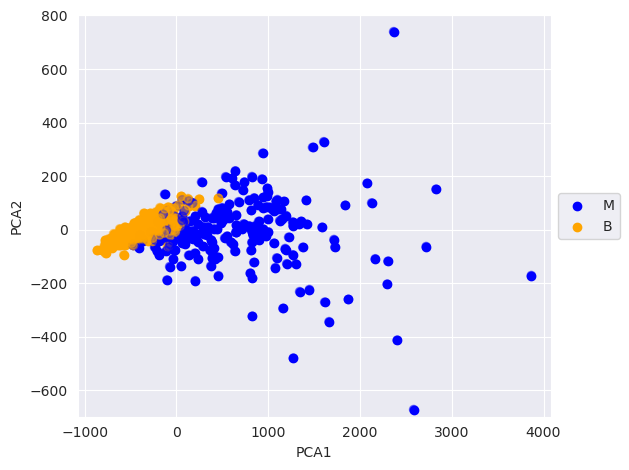

In [51]:
# you code here
# 2. PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

sns.set_style("darkgrid")  # set the aesthetic style of the plots

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principalComponents, columns=['PCA1', 'PCA2'])

# Concatenate the target column 'diagnosis' with the principal components
final_df = pd.concat([principal_df, data[['diagnosis']]], axis=1)

# Scatter plot
colors = {'M': 'blue', 'B': 'orange'}
fig, ax = plt.subplots()
for diagnosis, color in colors.items():
    indices = final_df['diagnosis'] == diagnosis
    ax.scatter(final_df.loc[indices, 'PCA1'], final_df.loc[indices, 'PCA2'], c=color, label=diagnosis)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')

# Calculate the desired range for both axes
range_pca1 = final_df['PCA1'].max() - final_df['PCA1'].min()
range_pca2 = 800  # setting this value as per your instruction

box_size_x = range_pca1 / 5.5
box_size_y = range_pca2 / 7.5

# Set limits and ticks based on the desired box sizes
ax.set_xlim([final_df['PCA1'].min() - 0.25 * box_size_x, final_df['PCA1'].max() + 0.25 * box_size_x])
ax.set_ylim([final_df['PCA2'].min() - 0.25 * box_size_y, 800])

ax.grid(True)  # Add a grid
ax.set_aspect('auto')  # Set the x and y axes to the same scale
# Move the legend outside the box
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjusts subplot params for better layout
plt.scatter(final_df['PCA1'], final_df['PCA2'], c=final_df['diagnosis'].map(colors), alpha=0.5)
plt.show()
